# Exploratory Data Analysis:

We would be performing data analysis on data containing all monthly transactions to know the behaviour. 

In [4]:
# import Libraries:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime

import statsmodels.tsa.api as smt

# Load and View Data

In [5]:
# Load monthly data:

def load_data():  
    return pd.read_csv('../data/monthly_data_training.csv')  

sales_data = load_data()

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6081 entries, 0 to 6080
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   GL_account                   6081 non-null   int64  
 1   GL_account_description       6081 non-null   object 
 2   account_id                   6081 non-null   int64  
 3   partition_ledger_year_month  6081 non-null   int64  
 4   amount_usd                   6081 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 237.7+ KB


In [7]:
sales_data.head()

,GL_account,GL_account_description,account_id,partition_ledger_year_month,amount_usd
0,50710,JP Morgan - AUD,550385,201501,-390217.24
1,50710,JP Morgan - AUD,550385,201502,230944.09
2,50710,JP Morgan - AUD,550385,201503,367259.69
3,50710,JP Morgan - AUD,550385,201504,567962.85
4,50710,JP Morgan - AUD,550385,201505,753175.60


# Data Cleaning:

In [8]:
# Remove noisy or unnecessary features/columns:
# Here GL_account_description is not needed as it is represented by the GL_account feature.

# drop unnecessary column:

df_clean = sales_data.drop("GL_account_description", axis = 1)
print(df_clean.head())

   GL_account  account_id  partition_ledger_year_month  amount_usd
0       50710      550385                       201501  -390217.24
1       50710      550385                       201502   230944.09
2       50710      550385                       201503   367259.69
3       50710      550385                       201504   567962.85
4       50710      550385                       201505   753175.60


In [9]:
# aggregate data based on accounts:

df_aggregated = df_clean.groupby('GL_account')['amount_usd'].sum().reset_index()
df_aggregated.head()

,GL_account,amount_usd
0,48910,1.334681e+05
1,50710,-1.868533e+08
2,59610,3.142289e+08
3,59611,-2.243508e+07
4,75110,2.061402e+07


# EDA for transaction data:

In [10]:
# Load detailed transactoin data:

def load_data():  
    return pd.read_csv('../data/transactions2015-June2019.csv')  

sales_data_detailed = load_data()

In [11]:
sales_data_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176755 entries, 0 to 176754
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   company                      176755 non-null  int64  
 1   company_name                 176755 non-null  object 
 2   GL_account                   176755 non-null  int64  
 3   GL_account_description       176755 non-null  object 
 4   account_id                   176755 non-null  int64  
 5   document_type                176755 non-null  object 
 6   name_alpha_explanation       176755 non-null  object 
 7   name_remark_explanation      62699 non-null   object 
 8   address_number               176755 non-null  float64
 9   address_name                 125274 non-null  object 
 10  partition_ledger_year_month  176755 non-null  int64  
 11  date_general_ledger          176755 non-null  object 
 12  amount_usd                   176755 non-null  float64
dtyp

In [12]:
sales_data_detailed.head()

,company,company_name,GL_account,GL_account_description,account_id,document_type,name_alpha_explanation,name_remark_explanation,address_number,address_name,partition_ledger_year_month,date_general_ledger,amount_usd
0,459,Chevron Australia Pty Ltd,112010,JP Morgan - USD,751280,RC,Bank Deposit,Rec. fr. Tohoku Electric,9931012.0,Tohoku Electric Power Company Inc USD,201807,7/17/2018,4700449.77
1,459,Chevron Australia Pty Ltd,112010,JP Morgan - USD,751280,RC,Bank Deposit,Rec fr Chugoku Electric Power,1345553.0,Chugoku Electric Power Company Inc USD,201808,8/30/2018,5284250.81
2,459,Chevron Australia Pty Ltd,112010,JP Morgan - USD,751280,JZ,JPM 09/10/2015,NWS-KE-14-NNAP-05-05-15-CH-Kan,0.0,NaN,201510,10/9/2015,3644851.76
3,459,Chevron Australia Pty Ltd,112010,JP Morgan - USD,751280,RC,Bank Deposit,Rec fr Woodside Energy Ltd,1063556.0,Woodside Energy Ltd AUD,201902,2/13/2019,4331.25
4,459,Chevron Australia Pty Ltd,112010,JP Morgan - USD,751280,JZ,JPM 18/11/2015,WOODSIDE CC CAPL SOLE GBP,0.0,NaN,201511,11/18/2015,0.00


# Data Cleaning:

In [13]:
# Show the unique or distinct values in each columns, form this we can make out that few rows are redundant
# and can be removed. For eg. company and company_name (we drop company_name)
sales_data_detailed.nunique()

company                           30
company_name                      30
GL_account                         8
GL_account_description            32
account_id                       129
document_type                     17
name_alpha_explanation          7090
name_remark_explanation         9488
address_number                  3309
address_name                    4616
partition_ledger_year_month       54
date_general_ledger             1208
amount_usd                     74908
dtype: int64

In [15]:
# Remove noisy or unnecessary features/columns:
# Here company_name is not needed as it is represented by the company feature. 
# Rest 4 columns are for reference comment purpose or are represented by other column so not needed in training.

# drop unnecessary column:

sales_data_detailed_clean = sales_data_detailed.drop(["company_name", "name_remark_explanation", "address_name", "name_alpha_explanation", "date_general_ledger"], axis = 1)
print(sales_data_detailed_clean.head())

   company  GL_account GL_account_description  account_id document_type  \
0      459      112010        JP Morgan - USD      751280            RC   
1      459      112010        JP Morgan - USD      751280            RC   
2      459      112010        JP Morgan - USD      751280            JZ   
3      459      112010        JP Morgan - USD      751280            RC   
4      459      112010        JP Morgan - USD      751280            JZ   

   address_number  partition_ledger_year_month  amount_usd  
0       9931012.0                       201807  4700449.77  
1       1345553.0                       201808  5284250.81  
2             0.0                       201510  3644851.76  
3       1063556.0                       201902     4331.25  
4             0.0                       201511        0.00  


In [16]:
# Remove NaN containing rows
# count the number of missing elements (NaN) in each column

counter_nan = sales_data_detailed_clean.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]
print(counter_nan)

# remove the rows with missing elements if needed or drop the column (we choose to drop the column)
#data_clean_col = sales_data_detailed_clean[counter_without_nan.keys()]
#print(data_clean_col.values)

company                        0
GL_account                     0
GL_account_description         0
account_id                     0
document_type                  0
address_number                 0
partition_ledger_year_month    0
amount_usd                     0
dtype: int64


In [17]:
sales_data_detailed_clean['document_type'].unique()

array(['RC', 'JZ', 'PK', 'PV', 'X3', 'PN', 'PO', 'PD', 'J&', 'JE', 'JX',
       'RO', 'X4', 'X7', 'JS', 'PP', 'JV'], dtype=object)

In [18]:
sales_data_detailed_clean['GL_account'].unique()

array([112010,  59610,  59611,  75110, 111910, 104410,  50710,  48910])

In [19]:
sales_data_detailed_clean['GL_account_description'].unique()

array(['JP Morgan - USD', 'JPMorgan Chase, Sydney',
       'JPMorgan Chase, Sydney FX', 'JP Morgan USD A/C - CAD',
       'JP Morgan USD A/C - EUR', 'JP Morgan USD A/C - GBP',
       'JP Morgan USD A/C - JPY', 'JP Morgan USD A/C - KRW',
       'JP Morgan USD A/C - NOK', 'JP Morgan USD A/C - NZD',
       'JP Morgan USD A/C - SGD', 'JP Morgan USD A/C - IDR',
       'JP Morgan USD A/C - CHF', 'JP Morgan USD A/C - THB',
       'JP Morgan - SG - AUD', 'JP Morgan Chase Bk N.A.,London',
       'JP Morgan Bank', 'JP Morgan USD A/C - INR', 'JP Morgan - JPY',
       'JP Morgan - NOK', 'JP Morgan - SGD', 'JP Morgan - EUR',
       'JP Morgan Bank - AUD', 'JP Morgan Bank USD A/C - EUR',
       'JP Morgan Bank USD A/C - GBP', 'JP Morgan Bank - USD',
       'Den Norske Bank, Oslo, Norway', 'JP Morgan USD A/C - CNY',
       'JP Morgan USD A/C - PGK', 'JP Morgan Bank - MYR',
       'JP Morgan - AUD', 'JPMorgan Chase Bank,Aukland,NZ'], dtype=object)

In [20]:
sales_data_detailed_clean['document_type'] = pd.factorize(sales_data_detailed_clean.document_type)[0]
sales_data_detailed_clean['GL_account_description'] = pd.factorize(sales_data_detailed_clean.GL_account_description)[0]

In [21]:
sales_data_detailed_clean.head()

,company,GL_account,GL_account_description,account_id,document_type,address_number,partition_ledger_year_month,amount_usd
0,459,112010,0,751280,0,9931012.0,201807,4700449.77
1,459,112010,0,751280,0,1345553.0,201808,5284250.81
2,459,112010,0,751280,1,0.0,201510,3644851.76
3,459,112010,0,751280,0,1063556.0,201902,4331.25
4,459,112010,0,751280,1,0.0,201511,0.00


In [22]:
# aggregate data based on accounts:

sales_data_detailed_clean_aggregated = sales_data_detailed_clean.groupby('GL_account')['amount_usd'].sum().reset_index()
sales_data_detailed_clean_aggregated.head()

,GL_account,amount_usd
0,48910,1.334681e+05
1,50710,-1.868533e+08
2,59610,3.142289e+08
3,59611,-2.243508e+07
4,75110,2.061402e+07


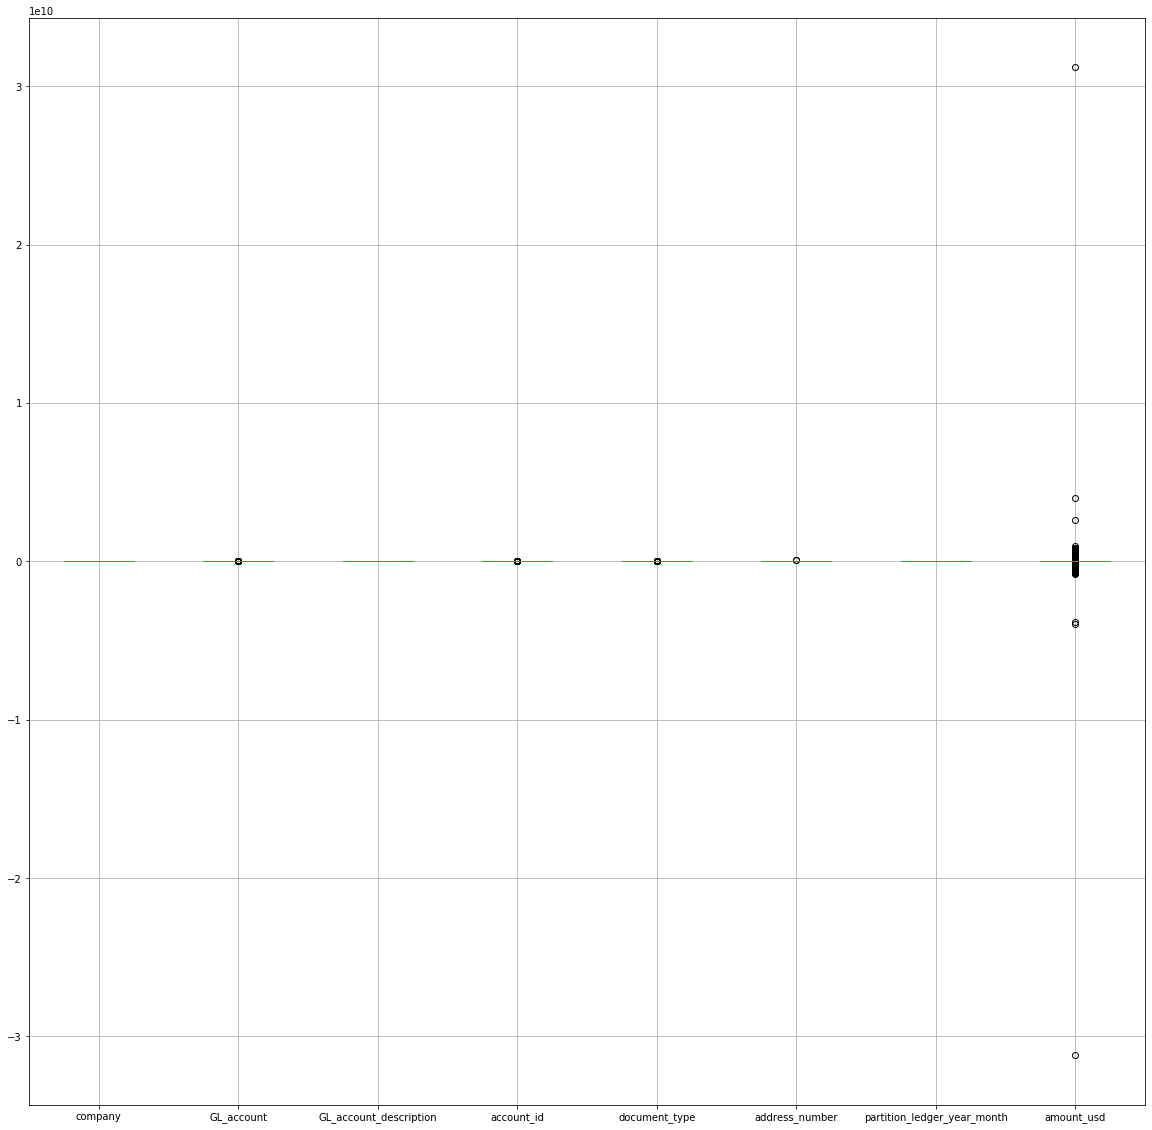

In [23]:
# See outliers in the data to eliminate them as they would hamper the anlaysis:
# Boxblot: to get outliers if any
#pd.options.display.mpl_style = 'default'
sales_data_detailed_clean.boxplot(figsize= (20,20), )

#found a few outliers in amount usd, which can be removed

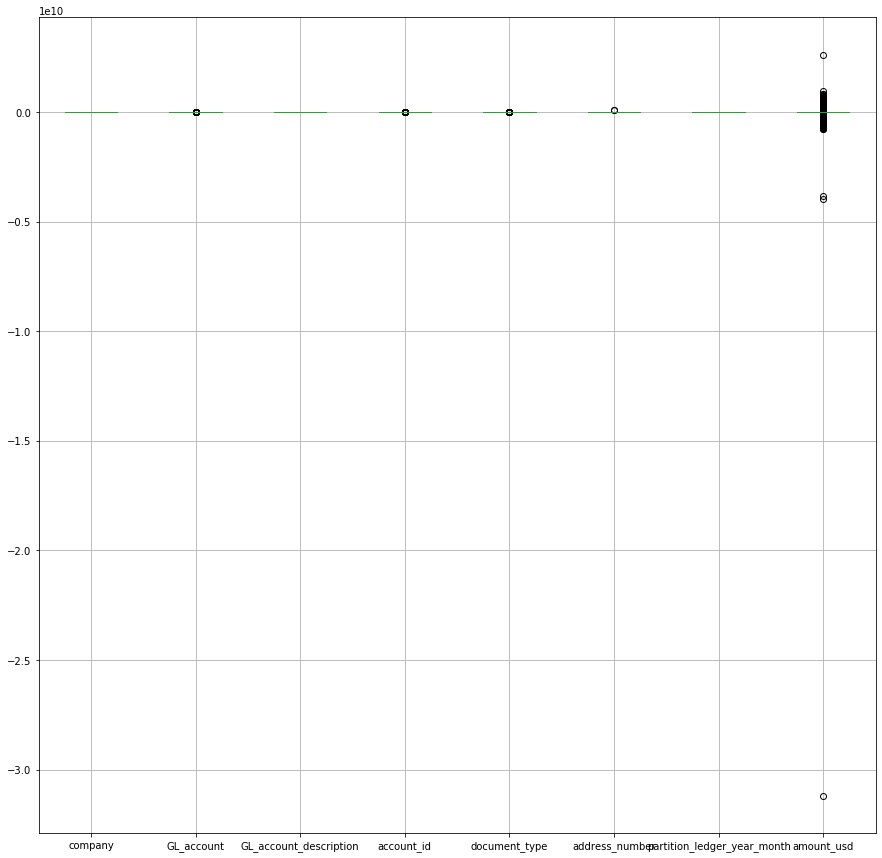

In [24]:
#removing outliers by taking top 99% quantile:
q = sales_data_detailed_clean["amount_usd"].quantile(0.99999)
data_clean_row_rem_outl1 = sales_data_detailed_clean[sales_data_detailed_clean["amount_usd"] < q]
data_clean_row_rem_outl1.boxplot(figsize= (15,15))

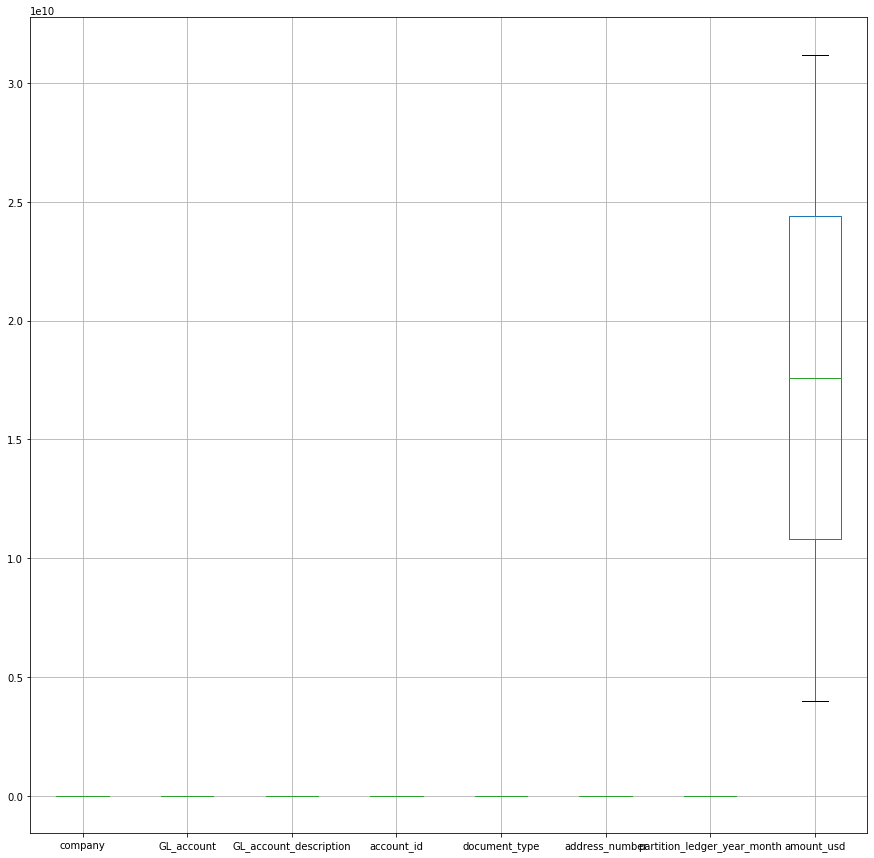

In [25]:
# removed outliers:
data_clean_row_rem_outl2 = sales_data_detailed_clean[sales_data_detailed_clean["amount_usd"] > q]
data_clean_row_rem_outl2.boxplot(figsize= (15,15))

# Standardize data (0 mean, 1 stdev)

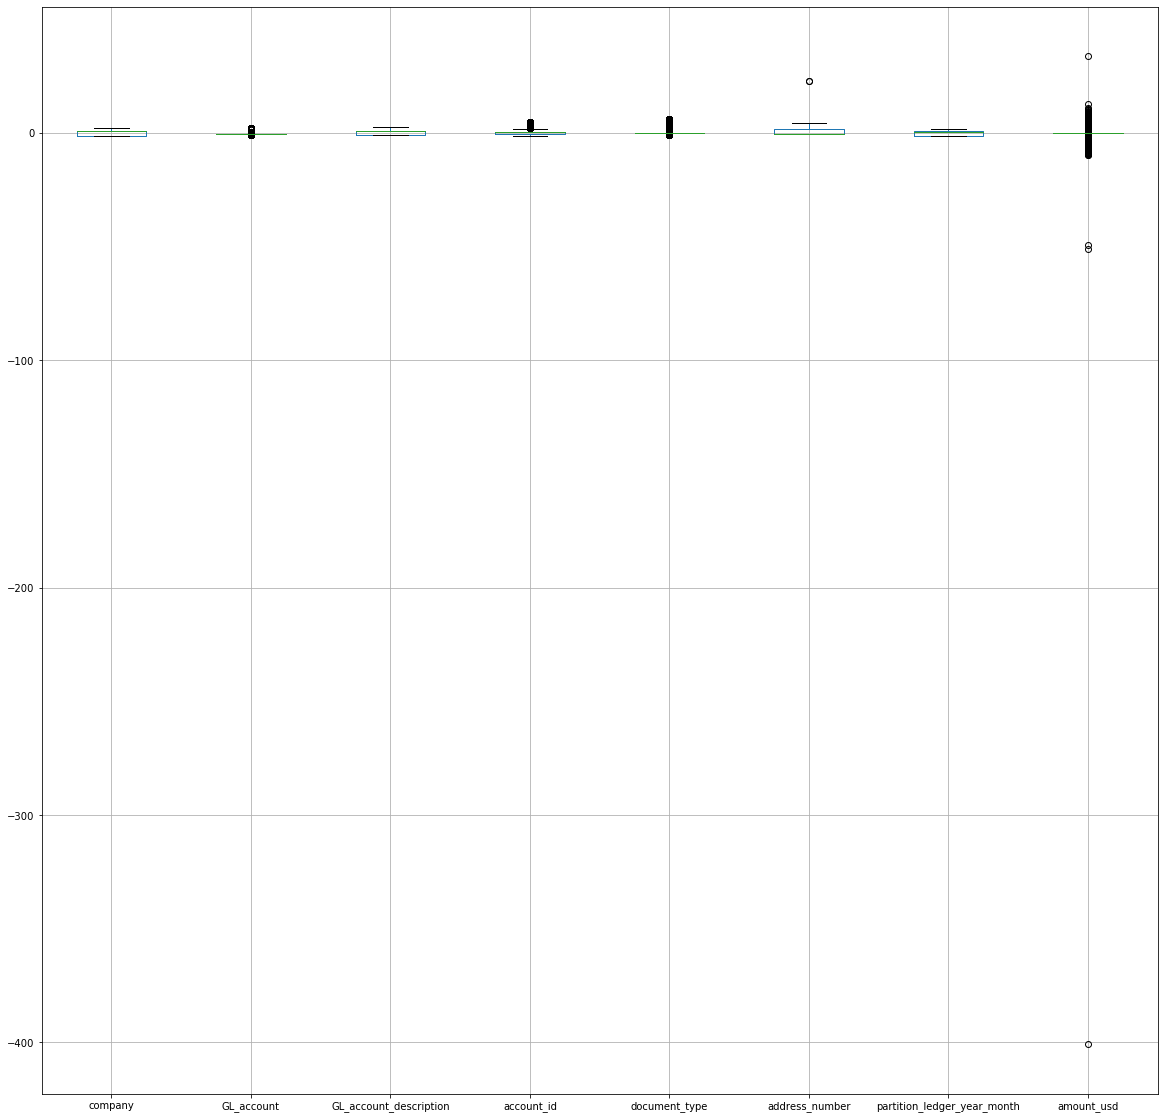

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
#standardize
array = data_clean_row_rem_outl1.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,7]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
data_clean_row_standz = pd.DataFrame(rescaledX, columns = list(data_clean_row_rem_outl1.columns.values) )

data_clean_row_standz.boxplot(figsize= (20,20))